In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
import pyproj
geod = pyproj.Geod(ellps='WGS84')   # to determine runways via azimuth

In [2]:
TMA_lon = [15.9854, 15.7247, 15.4078, 15.3864, 15.6594, 16.0503, 16.2683, 16.4347, 17.0932, 17.1607, 16.9543, 16.9061, 16.5407, 15.9854];

TMA_lat = [48.7869, 48.7339, 48.2864, 48.1267, 47.8739, 47.5028, 47.2939, 47.2395, 47.7082, 48.0066, 48.5436, 48.7150, 48.8143, 48.7869];
 
def plot_TMA_LOWW():
       
    rwy_16_34_lon=[16.58583, 16.59667]
    rwy_16_34_lat=[48.12194, 48.09222]

    rwy_11_29_lon=[16.53333, 16.58167]
    rwy_11_29_lat=[48.12694, 48.115]


    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy_16_34_lon, rwy_16_34_lat, color="red")
    plt.plot(rwy_11_29_lon, rwy_11_29_lat, color="red")

In [3]:
central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
 
def plot_horizontal_profile_LOWW(df, runway, linewidth, title = ""):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    plt.title(title)
    
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_LOWW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        
        #flight_states_df = flight_states_df[flight_states_df['altitude']>400] # temp
        
        #print(flight_states_df.tail())
        for seq, row in flight_states_df.groupby(level='sequence'):
        
            lon.append(row['lon'].item())
            lat.append(row['lat'].item())
        
        plt.plot(lon, lat, color='k', linewidth=linewidth)
        
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        #plt.plot(last_points_lon, last_points_lat, color='red', linewidth=linewidth)
        
        trajectory_point_last = [lat[-1], lon[-1]]

        # 30 seconds before:
        trajectory_point_before_last = [lat[-30], lon[-30]]
        
        #print(trajectory_point_before_last)
        #print(trajectory_point_last)
        
        trajectory_azimuth, temp1, temp2 = geod.inv(trajectory_point_before_last[0], trajectory_point_before_last[1],
                                                    trajectory_point_last[0], trajectory_point_last[1])
        #print(trajectory_azimuth)

In [4]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [5]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [6]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_11.csv"
week1_rwy_11_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_16.csv"
week1_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_29.csv"
week1_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week1_by_runways/osn_LOWW_states_TMA_2019_10_week1_rwy_34.csv"
week1_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week1_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

In [7]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_11.csv"
week2_rwy_11_df= pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_16.csv"
week2_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_29.csv"
week2_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week2_by_runways/osn_LOWW_states_TMA_2019_10_week2_rwy_34.csv"
week2_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week2_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

In [8]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_11.csv"
week3_rwy_11_df= pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_16.csv"
week3_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_29.csv"
week3_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week3_by_runways/osn_LOWW_states_TMA_2019_10_week3_rwy_34.csv"
week3_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week3_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

In [9]:
filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_11.csv"
week4_rwy_11_df= pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_11_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_16.csv"
week4_rwy_16_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_16_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_29.csv"
week4_rwy_29_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_29_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/LOWW/2019/osn_LOWW_states_TMA_2019/osn_LOWW_states_TMA_2019_10_week4_by_runways/osn_LOWW_states_TMA_2019_10_week4_rwy_34.csv"
week4_rwy_34_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
week4_rwy_34_df.set_index(['flight_id', 'sequence'], inplace = True)

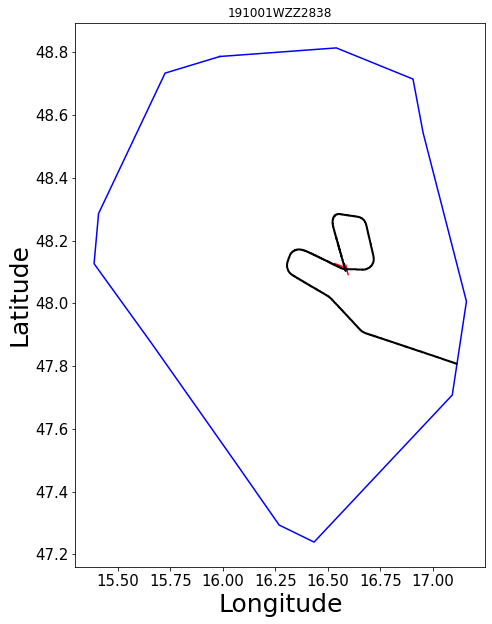

In [10]:
df = week1_rwy_16_df
flight_id = '191001WZZ2838'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

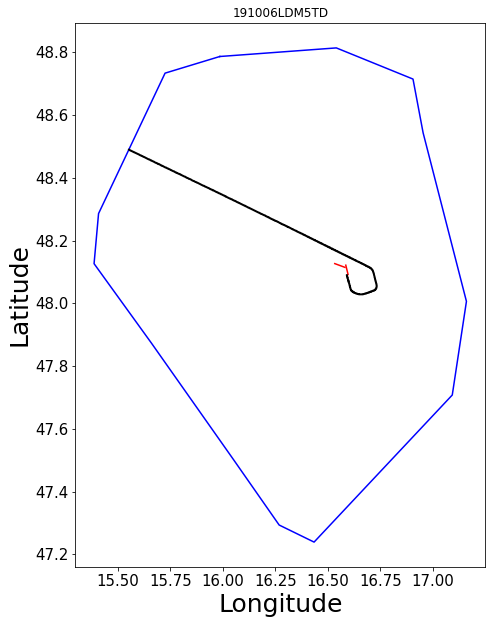

In [11]:
df = week1_rwy_34_df
flight_id = '191006LDM5TD'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

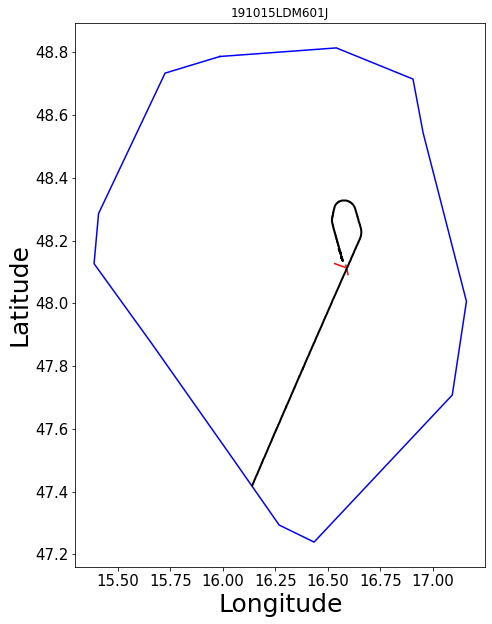

In [12]:
df = week3_rwy_16_df 
flight_id = '191015LDM601J'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

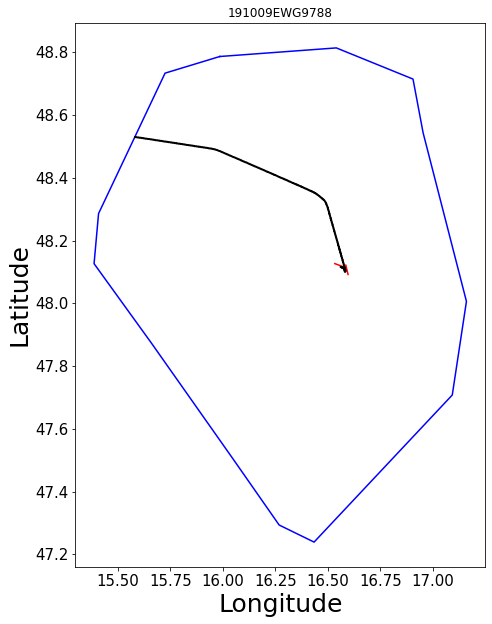

In [13]:
df = week2_rwy_16_df
flight_id = '191009EWG9788'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

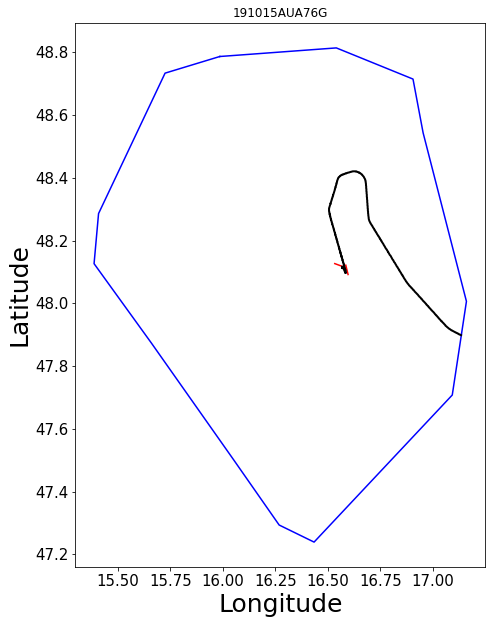

In [14]:
df = week3_rwy_16_df
flight_id = '191015AUA76G'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

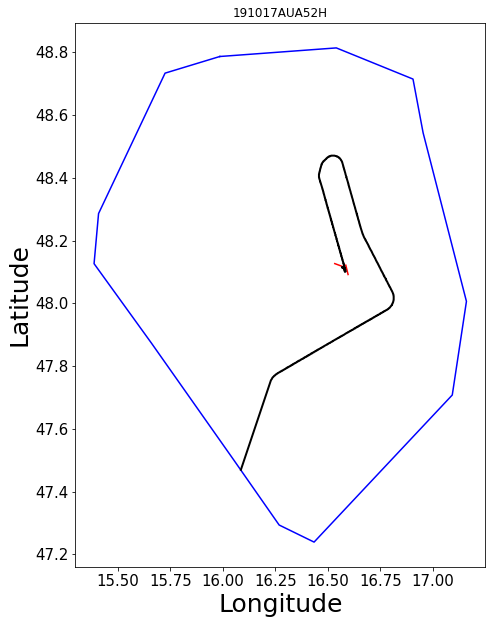

In [15]:
df = week3_rwy_16_df
flight_id = '191017AUA52H'
flight_df = df[df.index.get_level_values('flight_id') == flight_id]
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

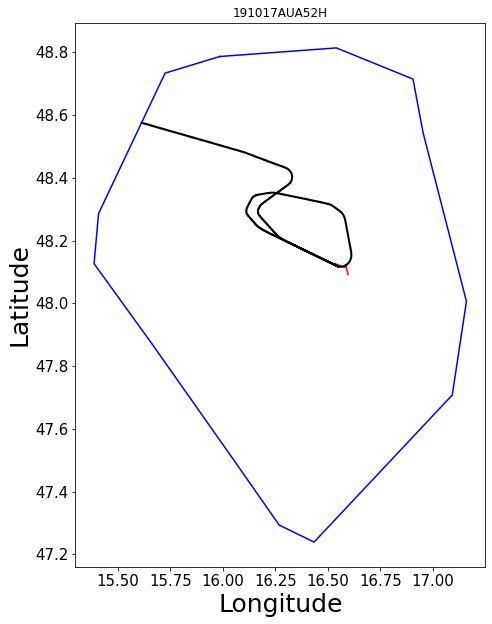

In [16]:
df = week3_rwy_11_df
flight_df = df[df.index.get_level_values('flight_id') == '191015AUA128'] # 2 attemps to land
plot_horizontal_profile_LOWW(flight_df, "x", 2, flight_id)

In [17]:
 #for flight_id, flight_id_group in week4_rwy_11_df.groupby(level='flight_id'):
 #       plot_horizontal_profile_LOWW(flight_id_group, "x", 2, flight_id)
        #

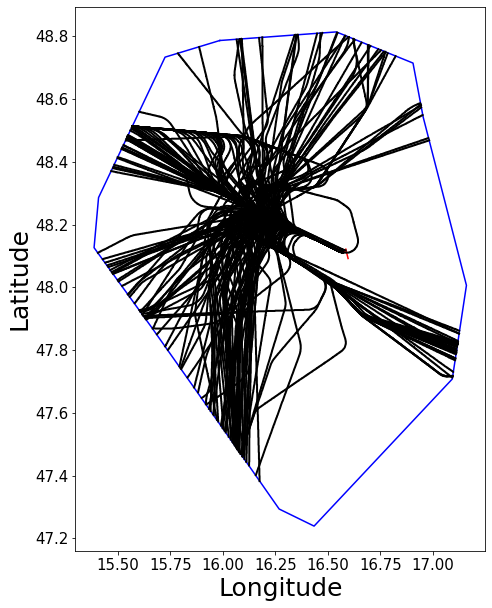

In [18]:
plot_horizontal_profile_LOWW(week1_rwy_11_df, "x", 2)

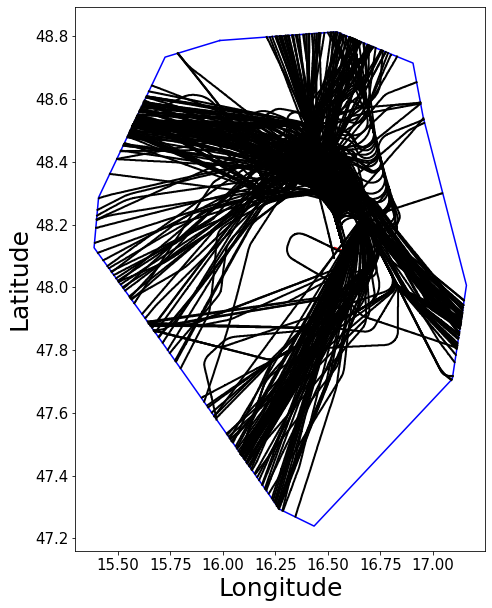

In [19]:
plot_horizontal_profile_LOWW(week1_rwy_16_df, "x", 2)
#check

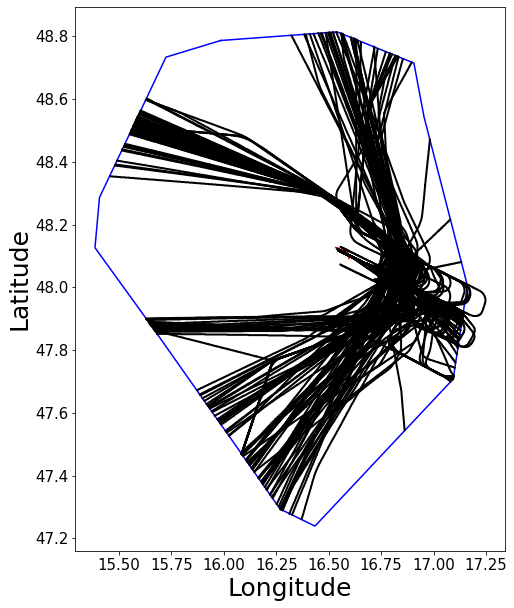

In [20]:
plot_horizontal_profile_LOWW(week1_rwy_29_df, "x", 2)

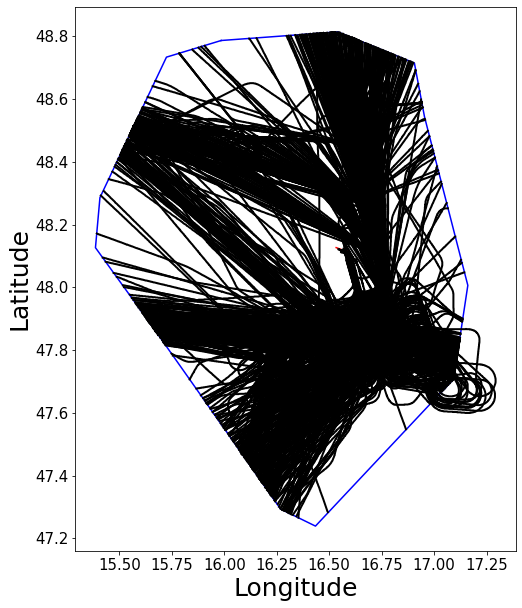

In [21]:
plot_horizontal_profile_LOWW(week1_rwy_34_df, "x", 2)

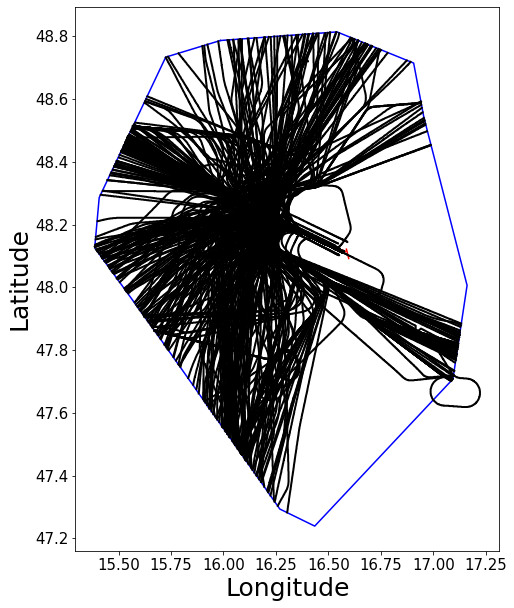

In [22]:
plot_horizontal_profile_LOWW(week2_rwy_11_df, "x", 2)

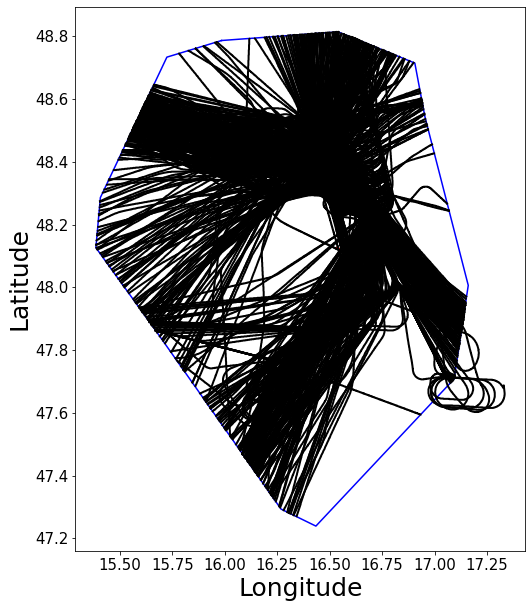

In [23]:
plot_horizontal_profile_LOWW(week2_rwy_16_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week2_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week2_rwy_34_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_11_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_16_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week3_rwy_34_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_11_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_16_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_29_df, "x", 2)

In [ ]:
plot_horizontal_profile_LOWW(week4_rwy_34_df, "x", 2)

In [ ]:
#plot_vertical_profile(df, 0, 2)